In [1]:
import os # importing OS library
from email.parser import Parser
import matplotlib.pyplot as plt
import math
from glob import glob
import multiprocessing
import matplotlib.pyplot as plt
import itertools 
import operator # importing operator
from collections import Counter  # importing counter
import csv # importing csv
import email.utils
import time
import datetime
import nltk
import string
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [2]:
rootDir = os.path.dirname(os.path.realpath('__file__'))

In [3]:
## Helper functions
def get_text_from_email(msg):
    '''To get the content from email objects'''
    parts = []
    for part in msg.walk():
        if part.get_content_type() == 'text/plain':
            parts.append( part.get_payload() )
    return ''.join(parts)

def split_email_addresses(line):
    '''To separate multiple email addresses'''
    email_list = []
    if line:
        line = line.replace("\n", "")
        line = line.replace("\t", "")
        line = line.replace(" ", "")

        line = line.split(",")

        for email_to_1 in line:
            email_list.append(email_to_1)
    else:
        email_list = None
    return email_list

In [4]:
def email_analyse(filename, listOfEmails):
    with open(filename, "r") as f:
        data = f.read()
        em = Parser().parsestr(data)
        email_header = {}
        email_header['file'] =  filename.split('/')[-2:]
        email_header['content'] = get_text_from_email(em)
        for key in em.keys():
            email_header[key] = em.get(key)
        if em.get('Date'):
            email_header['Date'] = email.utils.parsedate(email_header['Date'])
        if em.get('To'):
            email_header['To'] = split_email_addresses(email_header['To'])
        if em.get('From'):
            email_header['From'] = split_email_addresses(email_header['From'])
        if em.get('Bcc'):
            email_header['Bcc'] = split_email_addresses(email_header['Bcc'])
        if em.get('Cc'):
            email_header['Cc'] = split_email_addresses(email_header['Cc'])
        if em.get('X-To'):
            email_header['X-To'] = split_email_addresses(email_header['X-To'])
        email_header['user'] =  filename.split('/')[-2]
        listOfEmails.append(email_header)

In [5]:
def get_immediate_subdirectories(a_dir):
    return [name for name in os.listdir(a_dir)
            if os.path.isdir(os.path.join(a_dir, name))]

In [6]:
def get_listof_useremails(listOfEmails, path):
    include = ['sent', 'sent_items']
    [[email_analyse(os.path.join(directory, filename), listOfEmails) for filename in filenames] for directory, subdirectory, filenames in  os.walk(path) if directory.split('/')[-1] in include]

In [7]:
users = get_immediate_subdirectories(rootDir+'/data/enron/maildir/')

In [8]:
listOfEmails = []
if __name__ == '__main__':
    jobs = []
    for user in users :
        path = rootDir+'/data/enron/maildir/'+user+'/'
        p = multiprocessing.Process(target=get_listof_useremails(listOfEmails, path))
        jobs.append(p)
        p.start()

In [9]:
listOfEmailsAfter2001 = [em for em in listOfEmails if em.get('Date') and em.get('Date')[:2] in [(2001, 9), (2001, 10)]]

In [10]:
wnl = WordNetLemmatizer()
subtext = ''
for em in listOfEmailsAfter2001:
    if em.get("Subject") :
        subtext = subtext + (em.get("Subject")).lower()
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
filtered_words = [word for word in subtext.split() if word not in stop]
filtered_words = [''.join(ch for ch in word if ch not in string.punctuation) for word in filtered_words] # removing punctuation
filtered_words = [word for word in filtered_words if word] # removing empty string
filtered_words = [word for word in filtered_words if not all(num.isdigit() for num in word)] # removing all the numbers
filtered_words = [wnl.lemmatize(token) for token in filtered_words] # convert all the words to sigular
filtered_words = [wnl.lemmatize(token, 'v') for token in filtered_words] # lemmatize all the verbs
filtered_words = ' '.join(filtered_words)

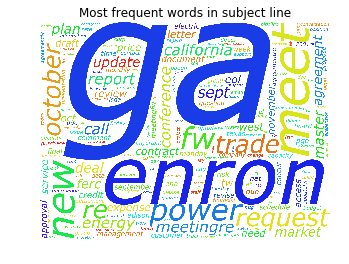

In [11]:
wordcloud = WordCloud(font_path=rootDir+'/verdanai.ttf',
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=2000,
                          height=1500
                         ).generate(filtered_words)


plt.imshow(wordcloud)
plt.title('Most frequent words in subject line')
plt.axis('off')
plt.show()

In [12]:
emtext = ''
for em in listOfEmailsAfter2001:
    if em.get("content") :
        emtext = emtext + (em.get("content")).lower()
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
filtered_words = [word for word in emtext.split() if word not in stop]
filtered_words = [''.join(ch for ch in word if ch not in string.punctuation) for word in filtered_words] # removing punctuation
filtered_words = [word for word in filtered_words if word] # removing empty string
filtered_words = [word for word in filtered_words if not all(num.isdigit() for num in word)] # removing all the numbers
filtered_words = [wnl.lemmatize(token) for token in filtered_words] # convert all the words to sigular
filtered_words = [wnl.lemmatize(token, 'v') for token in filtered_words] # lemmatize all the verbs
filtered_words = ' '.join(filtered_words)

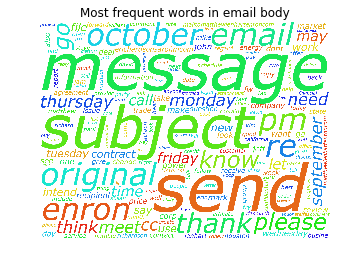

In [13]:
wordcloud = WordCloud(font_path=rootDir+'/verdanai.ttf',
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=2000,
                          height=1500
                         ).generate(filtered_words)


plt.imshow(wordcloud)
plt.title('Most frequent words in email body')
plt.axis('off')
plt.show()